# SciKit-RT workshop 19/01/21

## Setup

In [1]:
# Set path to sample data.
data_path = "~/workshop/sample_data"

# Set path to elastix software.
elastix_dir = "~/sw/elastix-5.0.1-mac"

# Set path to example elastix parameter files.
from skrt.registration import get_default_pfiles_dir
pfiles_dir = get_default_pfiles_dir("elastix")

from skrt.core import Defaults
# In place of interactive images, display static graphics that can be saved with notebook.
# Defaults().no_ui = True
# Omit user part of paths when printing object attributes.
# Defaults().compress_user = True

## Images

### Loading an image from a dicom file

In [2]:
from skrt import Image

im = Image(f"{data_path}/head_and_neck/CT/image")
im


Image
{
  affine: (4, 4) array 
  data: (256, 256, 126) array 
  date: '' 
  default_intensity: (-200, 300) 
  dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
  doses: [] 
  downsampling: None 
  files: [126 * <class 'skrt.core.File'>] 
  image_extent: [3 * <class 'tuple'>] 
  image_size: [3 * <class 'numpy.float64'>] 
  lims: [3 * <class 'tuple'>] 
  log_level: 'WARNING' 
  logger: <Logger Image (WARNING)> 
  n_voxels: [3 * <class 'int'>] 
  nifti_array: False 
  origin: [3 * <class 'numpy.float64'>] 
  path: ~/workshop/sample_data/head_and_neck/CT/image 
  plans: [] 
  plot_extent: {6 * keys of type <class 'str'>} 
  print_depth: 0 
  rgb_rescale_intercept: 0 
  rgb_rescale_slope: 100 
  rgb_weights: (0.299, 0.587, 0.114) 
  sinogram: None 
  source: ~/workshop/sample_data/head_and_neck/CT/image 
  source_type: 'dicom' 
  structure_sets: [] 
  subdir: '' 
  time: '' 
  timestamp: '' 
  title: 'image' 
  voxel_size: [3 * <class 'numpy.float64'>] 
}

### Press `tab` to see possible functions

im.

In [3]:
# Examine its properties
print("Voxel size:", im.get_voxel_size())
print("Origin:", im.get_origin())
print("Number of voxels:", im.get_n_voxels())

Voxel size: [2.148, 2.148, 3.0]
Origin: [-274.46301269531, -274.46301269531, -252.0]
Number of voxels: [256, 256, 126]


In [4]:
# Access the image array
data = im.get_data()
data.shape

(256, 256, 126)

### Plotting an image

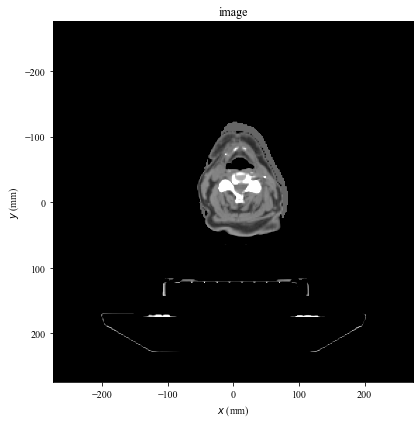

In [5]:
im.plot()

### Customising the plot

In [6]:
# Use python's "help" function for documentation
help(im.plot)

Help on method plot in module skrt.image:

plot(view='x-y', sl=None, idx=None, pos=None, scale_in_mm=True, ax=None, gs=None, figsize=6, save_as=None, zoom=None, zoom_centre=None, intensity=None, mpl_kwargs=None, show=True, colorbar=False, colorbar_label=None, clb_kwargs=None, clb_label_kwargs=None, title=None, no_xlabel=False, no_ylabel=False, no_xticks=False, no_yticks=False, no_xtick_labels=False, no_ytick_labels=False, annotate_slice=False, major_ticks=None, minor_ticks=None, ticks_all_sides=False, no_axis_labels=False, rois=None, roi_plot_type='contour', roi_opacity=None, roi_linewidth=None, consensus_type=None, exclude_from_consensus=None, consensus_color='blue', consensus_linewidth=None, legend=False, roi_kwargs=None, centre_on_roi=None, legend_bbox_to_anchor=None, legend_loc='lower left', dose=None, dose_opacity=0.5, dose_kwargs=None, grid=None, grid_opacity=1.0, grid_kwargs=None, flatten=False, xlim=None, ylim=None, zlim=None, shift=[None, None, None], mask=None, mask_threshold

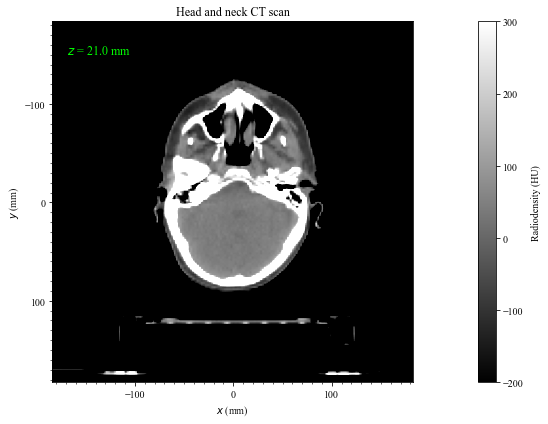

In [7]:
# Plotting with extra arguments
im.plot(
    pos=20,
    annotate_slice='lime',
    zoom=1.5,
    colorbar=True,
    title='Head and neck CT scan',
    major_ticks=100,
    minor_ticks=10
)

### Interactive plotting with `view()`

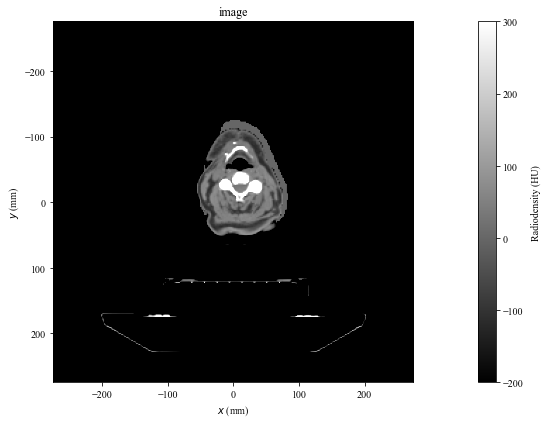

In [8]:
im.view(colorbar=True);

### Writing an image

In [9]:
im.write("my_image.nii")    # nifti
im.write("my_image_dicom")  # dicom

Wrote to NIfTI file: my_image.nii
Wrote dicom file(s) to directory: my_image_dicom


### Comparing two images

In [10]:
# Load MVCT scans from different treatment days
im1 = Image(f"{data_path}/head_and_neck/MVCT/1/image", title="MVCT 1")
im2 = Image(f"{data_path}/head_and_neck/MVCT/2/image", title="MVCT 2")

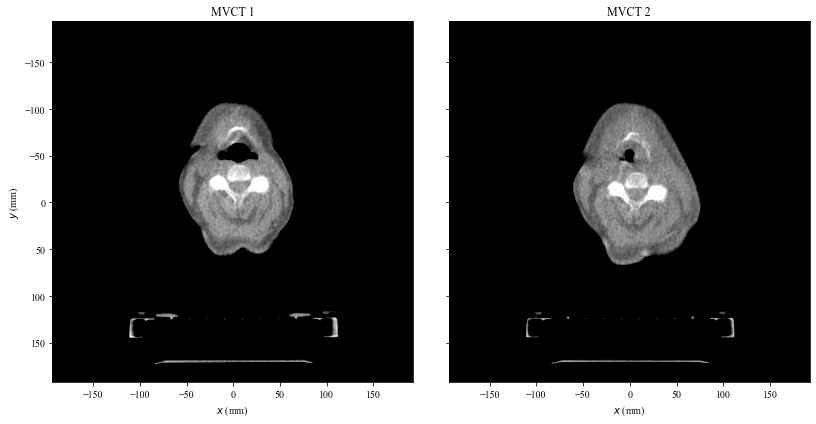

In [11]:
# View side-by-side
im1.view(images=im2);

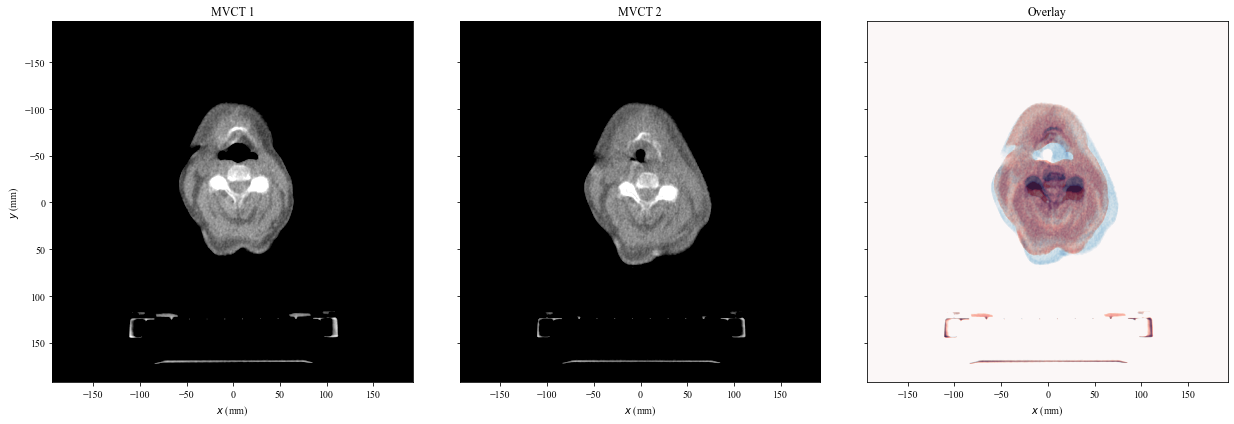

In [12]:
# Create a comparison image
im1.view(images=im2, comparison=True);

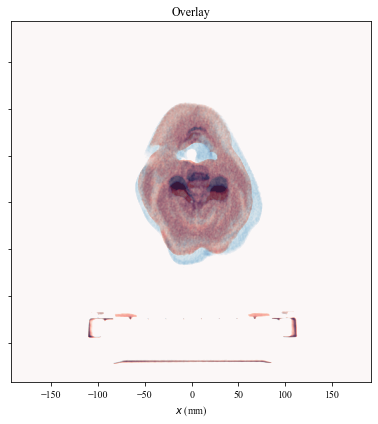

In [13]:
# View the comparison image only
im1.view(images=im2, comparison=True, comparison_only=True);

### Image manipulation

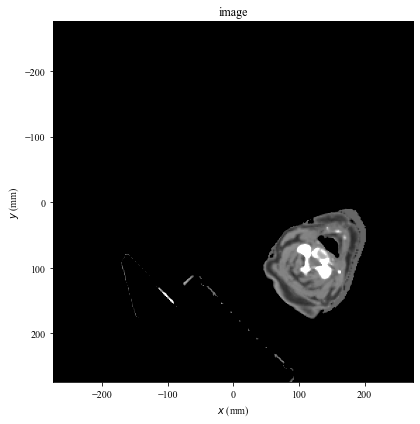

In [14]:
# Transforming
im2 = im.clone()  # Make a clone of original image so we don't change it
im2.transform(translation=[100, 100, 0], rotation=[0, 0, 45])
im2.plot()

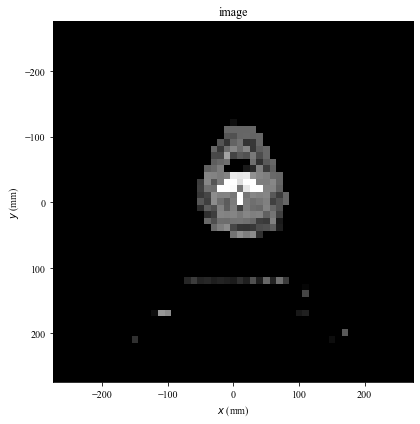

In [15]:
# Resampling
im2 = im.clone()
im2.resample(voxel_size=[10, 10, None])
im2.plot()

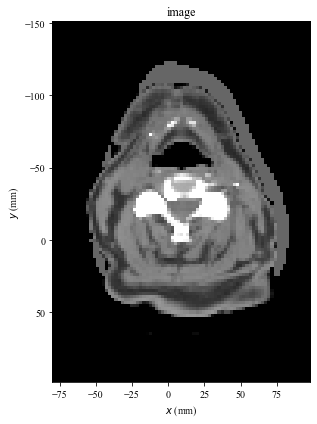

In [16]:
# Cropping
im2 = im.clone()
im2.crop(xlim=[-80, 100], ylim=[-150, 100])
im2.plot()

## Structure sets and ROIs

### Load a structure set from dicom

In [17]:
from skrt import StructureSet

structs = StructureSet(f"{data_path}/head_and_neck/CT/RTSTRUCT.dcm")
structs


StructureSet
{
  alpha_beta_ratios: {} 
  colors: None 
  date: '' 
  dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
  files: [] 
  ignore_dicom_colors: False 
  image: None 
  keep_renamed_only: False 
  loaded: True 
  multi_label: False 
  name: 'rtstruct.dcm' 
  names: None 
  path: ~/workshop/sample_data/head_and_neck/CT/RTSTRUCT.dcm 
  plans: [] 
  print_depth: 0 
  roi_kwargs: {} 
  rois: [9 * <class 'skrt.structures.ROI'>] 
  sources: [1 * <class 'str'>] 
  subdir: '' 
  summed_names: [] 
  time: '' 
  timestamp: '' 
  to_keep: None 
  to_remove: None 
}

### Print ROI names

In [18]:
structs.print_rois()

Alterio PCs
cricopharyngeus
IPC
left parotid
MPC
oral cavity
right parotid
SG larynx
SPC


### View the entire structure set

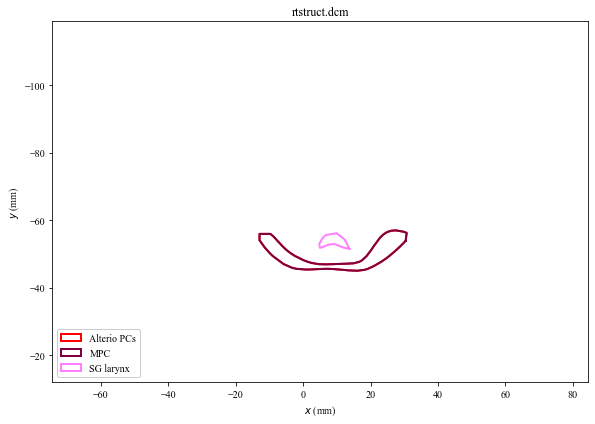

In [19]:
structs.view(legend=True);

### Access a single ROI

In [20]:
rois = structs.get_rois()
rois

[
 ROI
 {
   affine: None 
   alpha_over_beta: None 
   color: (1.0, 0.0, 0.0, 1) 
   constraint: None 
   contours: {1 * keys of type <class 'str'>} 
   contours_only: True 
   custom_color: True 
   date: '' 
   default_geom_method: 'contour' 
   dicom_dataset: <class 'pydicom.dataset.FileDataset'> 
   empty: False 
   files: [] 
   image: None 
   input_contours: {29 * keys of type <class 'float'>} 
   kwargs: {} 
   loaded: True 
   loaded_mask: False 
   mask: None 
   mask_threshold: 0.25 
   name: 'Alterio PCs' 
   number: 0 
   origin: None 
   original_name: 'Alterio PCs' 
   overlap_level: None 
   path: '' 
   plans: [] 
   print_depth: 0 
   roi_type: None 
   shape: None 
   slice_thickness_contours: 3.0 
   source: None 
   source_type: 'contour' 
   structure_set: <class 'skrt.structures.StructureSet'> 
   subdir: '' 
   time: '' 
   timestamp: '' 
   title: None 
   voxel_size: None 
 },
 
 ROI
 {
   affine: None 
   alpha_over_beta: None 
   color: (0.0, 1.0, 1.0, 1) 


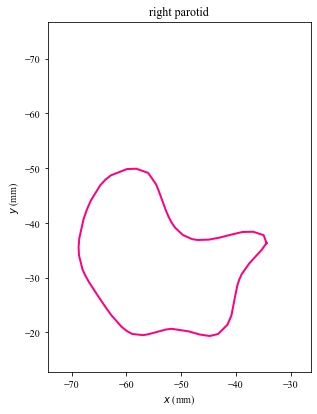

In [21]:
# Access by name
roi = structs.get_roi("right parotid")
roi.view(roi_plot_type='filled');

### Access the raw data of an ROI
Two ways to represent an ROI:
- Lists of contour points on each slice
- Binary mask

In [22]:
# Contours
contours = roi.get_contours()
contours

{-42.0: [array([[-45.45, -37.16],
         [-45.61, -36.93],
         [-47.62, -35.56],
         [-48.01, -35.43],
         [-51.77, -35.93],
         [-52.19, -36.85],
         [-52.31, -37.42],
         [-52.34, -39.41],
         [-52.13, -40.82],
         [-51.77, -42.15],
         [-50.98, -43.85],
         [-49.65, -45.67],
         [-48.56, -46.87],
         [-47.85, -47.64],
         [-47.49, -48.  ],
         [-44.79, -49.69],
         [-43.45, -49.66],
         [-40.65, -48.37],
         [-40.08, -45.74],
         [-40.31, -45.37],
         [-41.56, -43.78],
         [-43.1 , -41.97],
         [-44.04, -39.89]])],
 -39.0: [array([[-40.93, -40.17],
         [-41.18, -39.18],
         [-41.37, -37.06],
         [-41.59, -36.31],
         [-42.65, -34.9 ],
         [-44.42, -33.11],
         [-44.73, -32.73],
         [-45.87, -31.25],
         [-47.24, -30.28],
         [-48.17, -30.12],
         [-50.43, -30.16],
         [-52.33, -30.09],
         [-54.8 , -29.67],
         [-

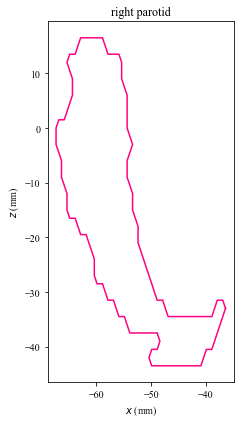

In [23]:
# Can also get contours in different orientations: 'x-y' (axial), 'x-z' (coronal), or 'y-z' (sagittal)
contours_xz = roi.get_contours('x-z')
roi.plot('x-z')

In [24]:
# Binary mask
mask = roi.get_mask()
mask

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

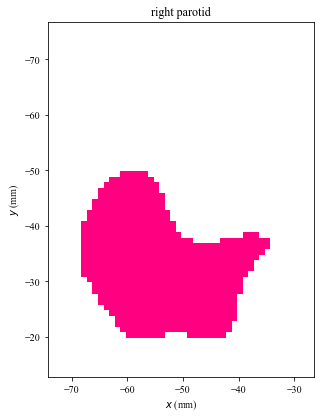

In [25]:
roi.plot(plot_type="mask")

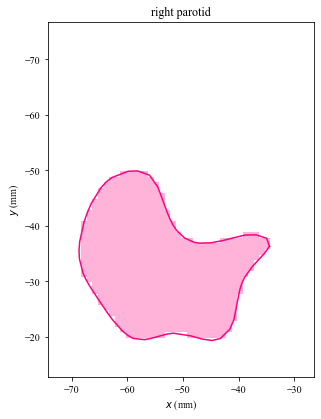

In [26]:
# Plot mask and contour together
roi.plot(plot_type="filled")

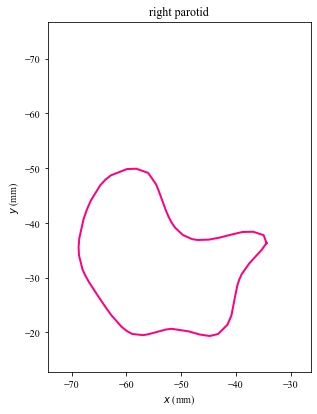

In [27]:
# Interactive viewing
roi.view();

### Get the geometric properties of an ROI

roi.get_

In [28]:
print("Volume:", roi.get_volume())
print("Area on central slice:", roi.get_area())
print("Centroid position:", roi.get_centroid())

Volume: 26248.94115
Area on central slice: 630.8742499999998
Centroid position: [-54.43882138 -36.81657327 -13.73869541]


In [29]:
# Get multiple properties in a table
roi.get_geometry()

,volume,centroid_x,centroid_y,centroid_z
right parotid,26248.94115,-54.438821,-36.816573,-13.738695


In [30]:
help(roi.get_geometry)

Help on method get_geometry in module skrt.structures:

get_geometry(metrics=None, vol_units='mm', area_units='mm', length_units='mm', centroid_units='mm', view='x-y', sl=None, pos=None, idx=None, method=None, units_in_header=False, global_vs_slice_header=False, name_as_index=True, nice_columns=False, decimal_places=None, force=True, html=False) method of skrt.structures.ROI instance
    Return a pandas DataFrame or html table of the geometric properties 
    listed in <metrics>.
    
    **Parameters:**
    
    metrics : list, default=None
        List of metrics to include in the table. Options:
    
            - "volume" : volume of entire ROI.
            - "area": area of ROI on a single slice.
    
            - "centroid": 3D centre-of-mass of ROI; will be split into
              three columns corresponding to the three axes.
            - "centroid_slice": 2D centre of mass on a single slice. Will
              be split into two columns corresponding to the two axes on
     

### Get geometric properties of all ROIs in the structure set

In [31]:
structs.get_geometry()

,volume,centroid_x,centroid_y,centroid_z
Alterio PCs,14132.210250,8.038967,-47.593794,-25.995163
cricopharyngeus,3465.426094,11.180181,-44.772523,-106.610008
IPC,4253.575496,9.442163,-48.584183,-80.860594
left parotid,17297.680800,64.654586,-34.119975,-4.702617
MPC,3018.541800,9.998945,-48.330949,-56.954918
oral cavity,108659.189100,7.192366,-83.015801,-15.518307
right parotid,26248.941150,-54.438821,-36.816573,-13.738695
SG larynx,8838.122100,9.148348,-67.552072,-67.021663
SPC,9242.566200,7.861652,-48.906307,-23.127187


In [32]:
structs.get_geometry(
    metrics=["volume", "area", "length_z"], 
    decimal_places=2, 
    vol_units="ml"
)

,volume,area,length_z
Alterio PCs,14.13,214.49,87.0
cricopharyngeus,3.47,138.14,24.0
IPC,4.25,175.05,27.0
left parotid,17.30,595.45,48.0
MPC,3.02,142.62,21.0
oral cavity,108.66,2365.19,63.0
right parotid,26.25,630.87,60.0
SG larynx,8.84,388.84,36.0
SPC,9.24,238.95,48.0


In [33]:
# This output is a pandas DataFrame - can write to csv, tex, etc
df = structs.get_geometry()
df.to_csv('geometric_data.csv')

### Assigning an Image to a StructureSet

Two ways:
- Use the `image` argument when creating the StructureSet
- Use the `set_image()` function on the StructureSet

In [34]:
from skrt import StructureSet
structs = StructureSet(f"{data_path}/head_and_neck/CT/RTSTRUCT.dcm", image=im)

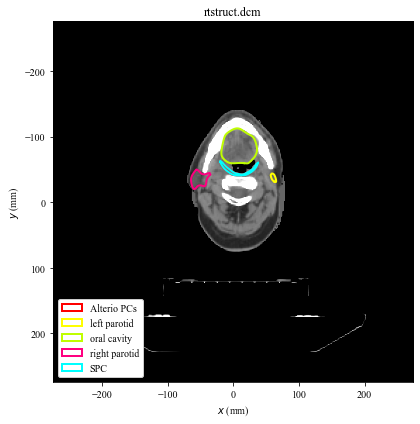

In [35]:
# View interactively with image
structs.view(legend=True);

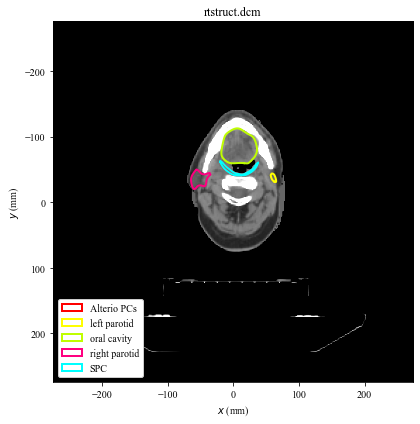

In [36]:
# View interactively with geometric data
structs.view(roi_info=True, legend=True);

### Comparing ROIs

In [37]:
# Extract two ROIs from the structure set and compare them
right_parotid = structs.get_roi("right parotid")
left_parotid = structs.get_roi("left parotid")

In [38]:
right_parotid.get_relative_area_diff(left_parotid)

0.05615191934050233

In [39]:
print("Distance:", right_parotid.get_abs_centroid_distance(left_parotid))
print("Dice score:", right_parotid.get_dice(left_parotid))

Distance: 119.46615460504522
Dice score: 0.0


In [40]:
# Can also get comparison table as a DataFrame
right_parotid.get_comparison(left_parotid)

,dice,centroid_x,centroid_y,centroid_z
right parotid,0.0,119.093408,2.696598,9.036079


### Comparing one structure set to another

In [41]:
# Let's load one of the MVCT structure sets and print its ROIs...
structs_mv = StructureSet(f"{data_path}/head_and_neck/MVCT/1/RTSTRUCT.dcm")
structs_mv.print_rois()

alterio_pc
mpc
oral_cavity
parotid_left
parotid_right
sg_larynx
smg_left
smg_right
spc
spinal_cord


In [42]:
# Let's look again at the ROIs in the kVCT structure set...
structs.print_rois()

Alterio PCs
cricopharyngeus
IPC
left parotid
MPC
oral cavity
right parotid
SG larynx
SPC


### Renaming and filtering ROIs

In [43]:
# Make a naming dictionary (note: case insensitive, * for wildcard)
# Maps desired name : potential input names

names = {
    'MPC': 'mpc',
    'Oral cavity': 'oral*cavity',
    'SPC': 'spc',
    'SG larynx': 'sg*',
    'Left parotid': ['left*parotid', 'parotid*left'],
    'Right parotid': ['right*parotid', 'parotid*right']
}

MPC
Oral cavity
SPC
SG larynx
Left parotid
Right parotid


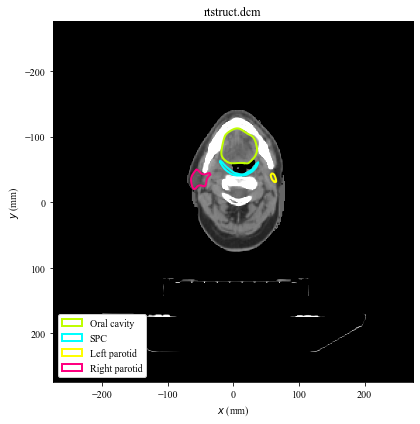

In [44]:
# Make a filtered copy of original structure set
structs_kv = structs.filtered_copy(names=names, keep_renamed_only=True)
structs_kv.print_rois()
structs_kv.view(legend=True);

MPC
Oral cavity
SPC
SG larynx
Left parotid
Right parotid


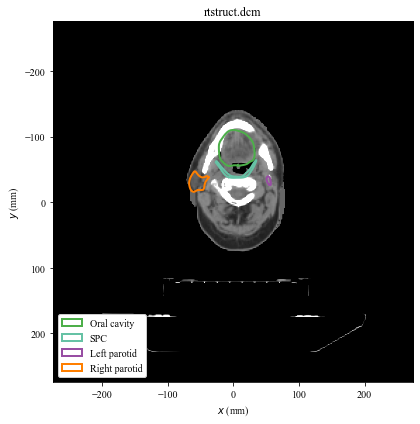

In [45]:
# Could also load the StructureSet with the naming dictionary
structs_mv = StructureSet(
    f"{data_path}/head_and_neck/MVCT/1/RTSTRUCT.dcm",  
    names=names, 
    keep_renamed_only=True,
    ignore_dicom_colors=True,
    image=im
)
structs_mv.print_rois()
structs_mv.view(legend=True);

In [46]:
# Get comparison table
structs_kv.get_comparison(
    structs_mv, 
    metrics=["dice", "centroid"],
    decimal_places=2
)

,dice,centroid_x,centroid_y,centroid_z
MPC,0.00,-4.22,5.26,-0.81
Oral cavity,0.42,-3.61,2.77,-3.55
SPC,0.00,-3.27,3.31,-1.86
SG larynx,0.24,-3.93,4.59,-0.43
Left parotid,0.20,-4.14,2.51,-1.20
Right parotid,0.15,-2.32,3.66,-1.54


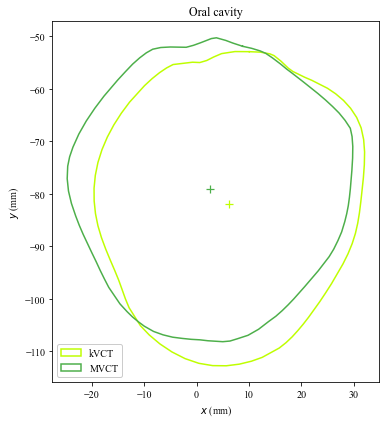

In [47]:
# Plot comparisons
roi = structs_kv.get_roi("Oral cavity")
roi2 = structs_mv.get_roi("Oral cavity")
roi.plot_comparison(roi2, names=['kVCT', 'MVCT'], plot_type='centroid')

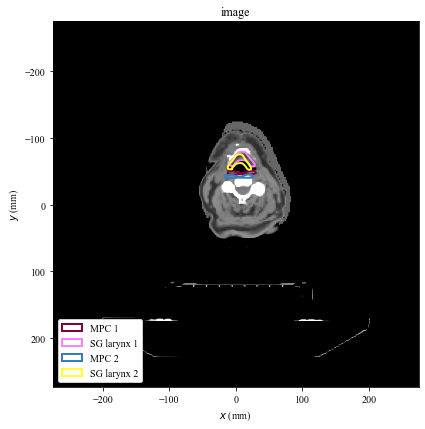

In [48]:
# Interactively view both structure sets
im.view(rois=[structs_kv, structs_mv], compare_rois=['dice', 'dice_slice'], legend=True);

### Consensus contours

In [49]:
# Load ROIs from multiple nifti files
from skrt import StructureSet

iov = StructureSet(f"{data_path}/rectum_iov/")
iov.print_rois()

rectum_01
rectum_02
rectum_03
rectum_04
rectum_05
rectum_06
rectum_07
rectum_08
rectum_09
rectum_10
rectum_11


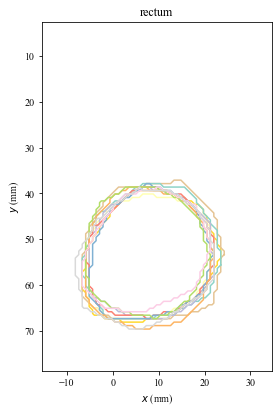

In [50]:
iov.plot(plot_type="contour", idx=7)

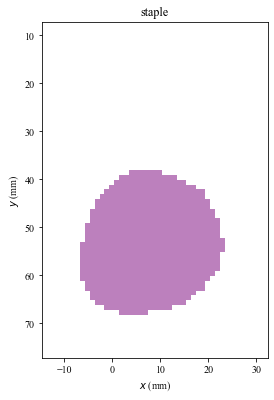

In [51]:
staple = iov.get_staple()
staple.plot(idx=7)

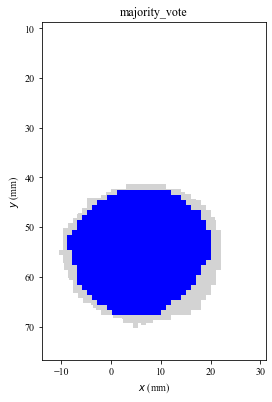

In [52]:
# Quick consensus plotting functions
iov.plot_consensus('majority', rois_in_background=True, color='blue', idx=7)

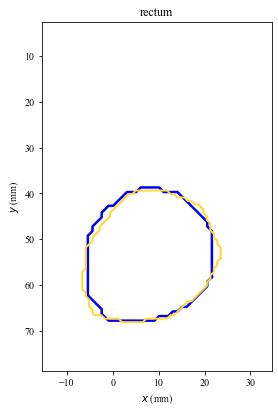

In [53]:
# Interactively compare each contour to the consensus of all others
iov.view(roi_plot_type='contour', roi_consensus=True, compare_rois=['dice', 'dice_slice']);

In [54]:
# Compare every ROI to the consensus of all others
iov.get_comparison(comp_type='consensus', consensus_type='majority')

,dice,centroid_x,centroid_y,centroid_z
rectum_01 vs. majority_vote,0.922808,0.007323,0.038405,0.719469
rectum_02 vs. majority_vote,0.841929,-0.327946,0.525510,-0.971025
rectum_03 vs. majority_vote,0.938758,-0.505960,0.104133,0.099319
rectum_04 vs. majority_vote,0.839382,0.006396,-3.581556,-2.554699
rectum_05 vs. majority_vote,0.832204,1.144542,1.702197,0.549148
rectum_06 vs. majority_vote,0.866623,-0.376516,-0.358800,-2.148574
rectum_07 vs. majority_vote,0.912849,0.079607,-0.659794,-1.698787
rectum_08 vs. majority_vote,0.914117,0.309508,-1.554955,-0.864891
rectum_09 vs. majority_vote,0.858279,0.159422,1.303287,-2.848375
rectum_10 vs. majority_vote,0.900288,0.605786,0.214758,0.443382


### Loading ROIs from a multi-label array

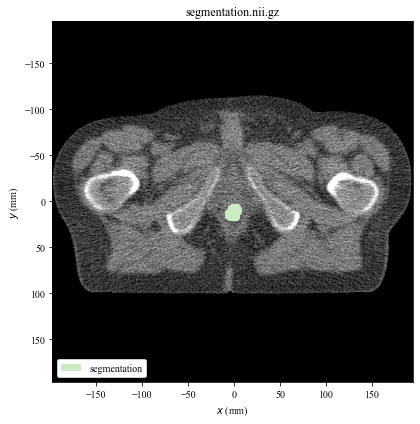

In [55]:
# Try loading the output of an InnerEye segmentation...
from skrt import StructureSet
structs_innereye = StructureSet(f"{data_path}/innereye/segmentation.nii.gz", 
                                image=f"{data_path}/innereye/MVCT.nii.gz")
structs_innereye.view(roi_plot_type='mask', legend=True);

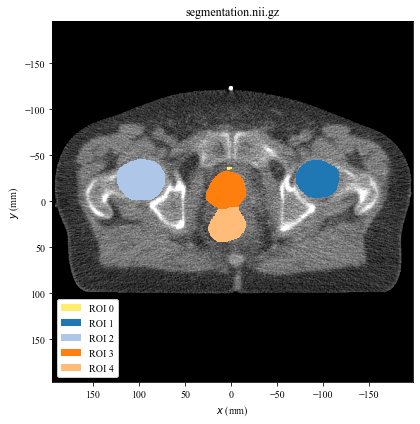

In [56]:
# Load with the multi_label option
structs_innereye = StructureSet(f"{data_path}/innereye/segmentation.nii.gz", 
                                image=f"{data_path}/innereye/MVCT.nii.gz",
                                multi_label=True)
structs_innereye.view(roi_plot_type='mask', legend=True);

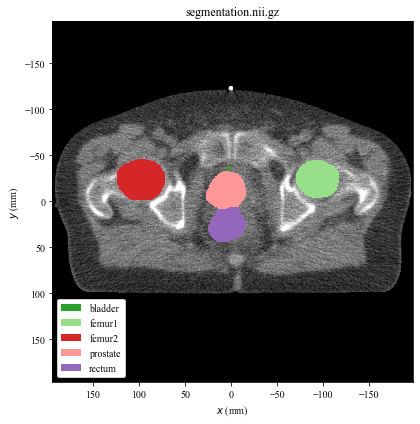

In [57]:
# Set custom names
names = ["bladder", "femur1", "femur2", "prostate", "rectum"]
structs_innereye = StructureSet(f"{data_path}/innereye/segmentation.nii.gz", 
                                image=f"{data_path}/innereye/MVCT.nii.gz",
                                multi_label=True,
                                names=names
                               )
structs_innereye.view(roi_plot_type='mask', legend=True);

## Dose maps

### Load a dose map from dicom

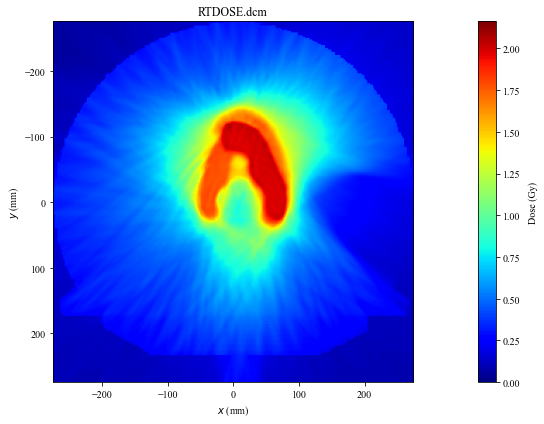

In [58]:
from skrt import Dose

dose = Dose(f"{data_path}/head_and_neck/CT/RTDOSE.dcm")
dose.view(colorbar=True);

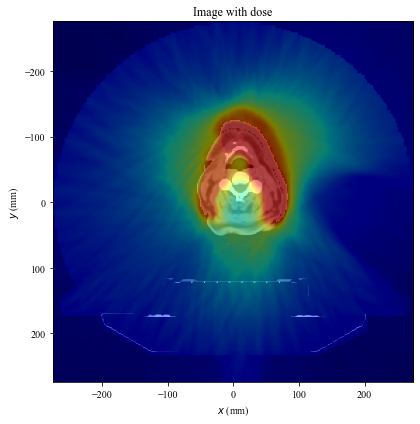

In [59]:
# Assign an image and view overlay
dose.set_image(im)
dose.view(include_image=True, title="Image with dose");

### Get dose inside an ROI

In [60]:
# Get mean dose in left parotid 

roi = structs_kv.get_roi("Left parotid")

print("mean dose:", dose.get_mean_dose(roi))

mean dose: 1.3723781


In [61]:
# Get dose inside every voxel in the ROI
print(dose.get_dose_in_roi(roi))

[0.75665   0.3342473 0.4770522 ... 1.687584  1.7585137 1.6275979]


### Plot dose-volume histogram

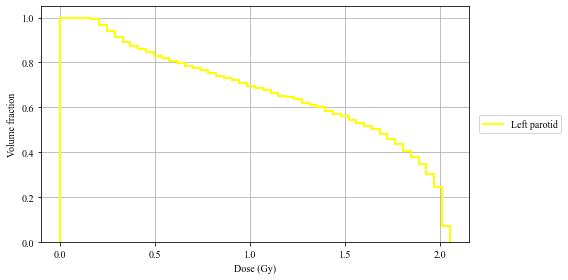

In [62]:
dose.plot_DVH(roi)

## Image registration

- Making a Registration object
- Viewing and adding default parameter files
- Running the registration, viewing results
- Transforming a dose field (then compare)
- Transforming a structure set one way
- Compare
- Get consensus of both ways

### Create a Registration object

In [63]:
# First, set elastix directory if needed
from skrt.registration import set_engine_dir
set_engine_dir(elastix_dir)

In [64]:
# Create a Registration object
from skrt.registration import Registration

reg = Registration(
    'mvct_fixed',
    fixed=f'{data_path}/head_and_neck/MVCT/1/image/',
    moving=f'{data_path}/head_and_neck/CT/image/',
    capture_output=True,
    log_level="INFO",
    overwrite=True  # Remove any existing data
)

In [65]:
# View the contents of the registration
reg


Registration
{
  capture_output: True 
  deformation_fields: {} 
  engine: <skrt.registration.Elastix object at 0x7f9012d77d30> 
  file_types: {2 * keys of type <class 'str'>} 
  fixed_image: <class 'skrt.image.Image'> 
  fixed_mask_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/fixed_mask.nii.gz 
  fixed_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/fixed.nii.gz 
  fixed_source: '~/workshop/sample_data/head_and_neck/MVCT/1/image/' 
  jacobians: {} 
  keep_tmp_dir: False 
  log_level: 'INFO' 
  logger: <Logger Registration (INFO)> 
  moving_grid_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/moving_grid.nii.gz 
  moving_image: <class 'skrt.image.Image'> 
  moving_mask_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/moving_mask.nii.gz 
  moving_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/moving.nii.gz 
  moving_source: '~/workshop/sample_data/head_and_neck/CT/image/' 
  outdirs: {} 
  path: ~/codeshare/scikit-rt/examples/noteboo

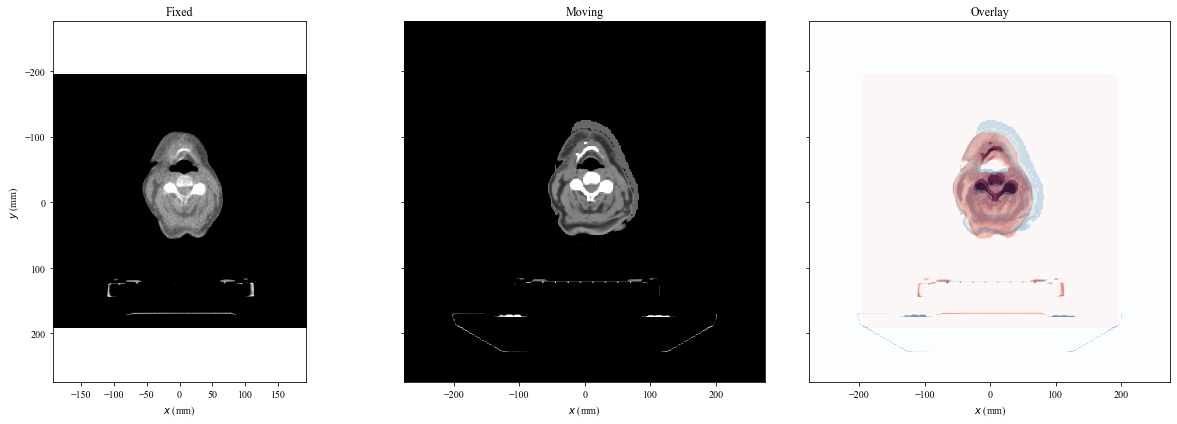

In [66]:
# View input images
reg.view_init()

In [67]:
# View registration steps (none added yet!)
reg.steps

[]

In [68]:
# Add a step
reg.clear()
reg.add_pfile(f"{pfiles_dir}/MI_Translation.txt", name="translation")

In [69]:
reg.steps

['translation']

In [70]:
# Inspect the contents of the input file
reg.get_input_parameters("translation")

{'FixedInternalImagePixelType': 'float',
 'MovingInternalImagePixelType': 'float',
 'UseDirectionCosines': True,
 'Registration': 'MultiResolutionRegistration',
 'Interpolator': 'BSplineInterpolator',
 'ResampleInterpolator': 'FinalBSplineInterpolator',
 'Resampler': 'DefaultResampler',
 'FixedImagePyramid': 'FixedRecursiveImagePyramid',
 'MovingImagePyramid': 'MovingRecursiveImagePyramid',
 'Optimizer': 'AdaptiveStochasticGradientDescent',
 'Transform': 'TranslationTransform',
 'Metric': 'AdvancedMattesMutualInformation',
 'AutomaticScalesEstimation': True,
 'AutomaticTransformInitialization': True,
 'HowToCombineTransforms': 'Compose',
 'UseNormalization': True,
 'NumberOfHistogramBins': 32,
 'ErodeMask': True,
 'RequiredRatioOfValidSamples': 0.05,
 'NumberOfResolutions': 4,
 'ImagePyramidSchedule': [8, 8, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1],
 'MaximumNumberOfIterations': 250,
 'NumberOfSpatialSamples': 2048,
 'NewSamplesEveryIteration': True,
 'ImageSampler': 'Random',
 'BSplineInterpolat

In [71]:
# Adjust a parameter
reg.adjust_pfile("translation", params={"MaximumNumberOfIterations": 400})
reg.get_input_parameters("translation")

{'FixedInternalImagePixelType': 'float',
 'MovingInternalImagePixelType': 'float',
 'UseDirectionCosines': True,
 'Registration': 'MultiResolutionRegistration',
 'Interpolator': 'BSplineInterpolator',
 'ResampleInterpolator': 'FinalBSplineInterpolator',
 'Resampler': 'DefaultResampler',
 'FixedImagePyramid': 'FixedRecursiveImagePyramid',
 'MovingImagePyramid': 'MovingRecursiveImagePyramid',
 'Optimizer': 'AdaptiveStochasticGradientDescent',
 'Transform': 'TranslationTransform',
 'Metric': 'AdvancedMattesMutualInformation',
 'AutomaticScalesEstimation': True,
 'AutomaticTransformInitialization': True,
 'HowToCombineTransforms': 'Compose',
 'UseNormalization': True,
 'NumberOfHistogramBins': 32,
 'ErodeMask': True,
 'RequiredRatioOfValidSamples': 0.05,
 'NumberOfResolutions': 4,
 'ImagePyramidSchedule': [8, 8, 4, 4, 4, 2, 2, 2, 1, 1, 1, 1],
 'MaximumNumberOfIterations': 400,
 'NumberOfSpatialSamples': 2048,
 'NewSamplesEveryIteration': True,
 'ImageSampler': 'Random',
 'BSplineInterpolat

In [72]:
# Perform registration
reg.register()

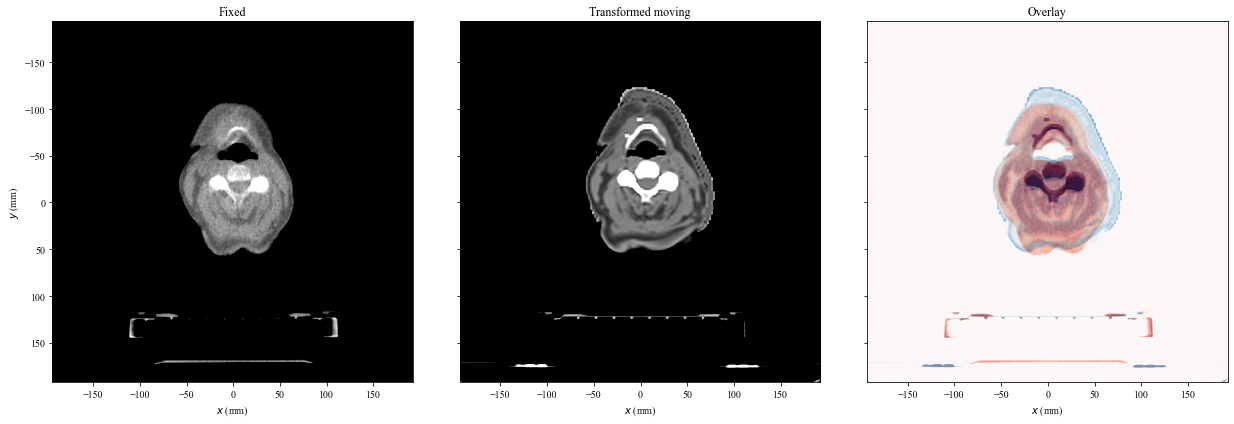

In [73]:
# View the results
reg.view_result()

In [74]:
# Maybe we need to add another step! Add a BSpline (deformable) step
reg.add_pfile(f"{pfiles_dir}/MI_BSpline30.txt", name="bspline")
reg.steps

['translation', 'bspline']

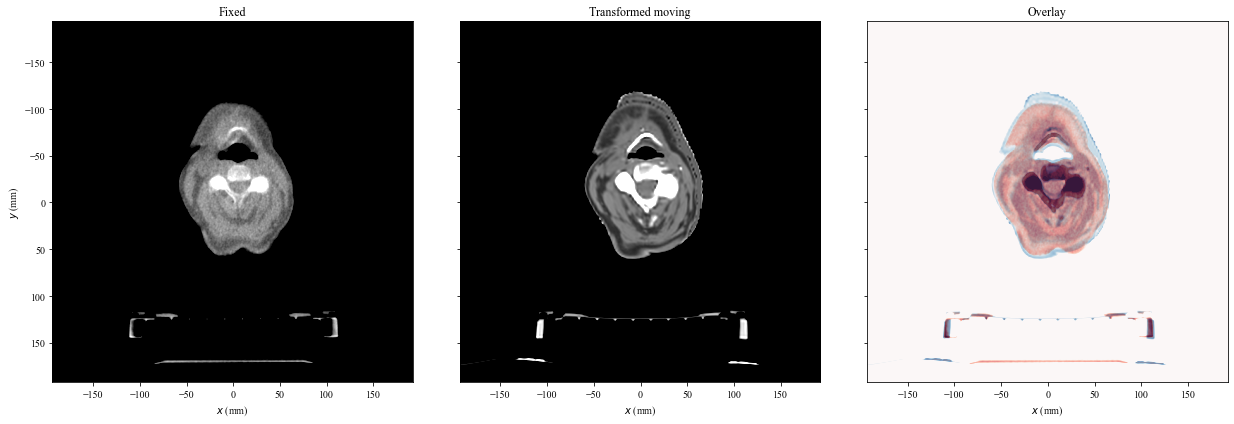

In [75]:
reg.view_result()

In [76]:
# Load a pre-existing registration result
reg = Registration("mvct_fixed")
reg


Registration
{
  capture_output: False 
  deformation_fields: {} 
  engine: <skrt.registration.Elastix object at 0x7f9012cd3fa0> 
  file_types: {2 * keys of type <class 'str'>} 
  fixed_image: <class 'skrt.image.Image'> 
  fixed_mask_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/fixed_mask.nii.gz 
  fixed_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/fixed.nii.gz 
  fixed_source: None 
  jacobians: {} 
  keep_tmp_dir: False 
  log_level: 'WARNING' 
  logger: <Logger Registration (WARNING)> 
  moving_grid_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/moving_grid.nii.gz 
  moving_image: <class 'skrt.image.Image'> 
  moving_mask_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/moving_mask.nii.gz 
  moving_path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed/moving.nii.gz 
  moving_source: None 
  outdirs: {2 * keys of type <class 'str'>} 
  path: ~/codeshare/scikit-rt/examples/notebooks/mvct_fixed 
  pfiles: {2 * keys of type <class 'str'

### Transforming dose fields

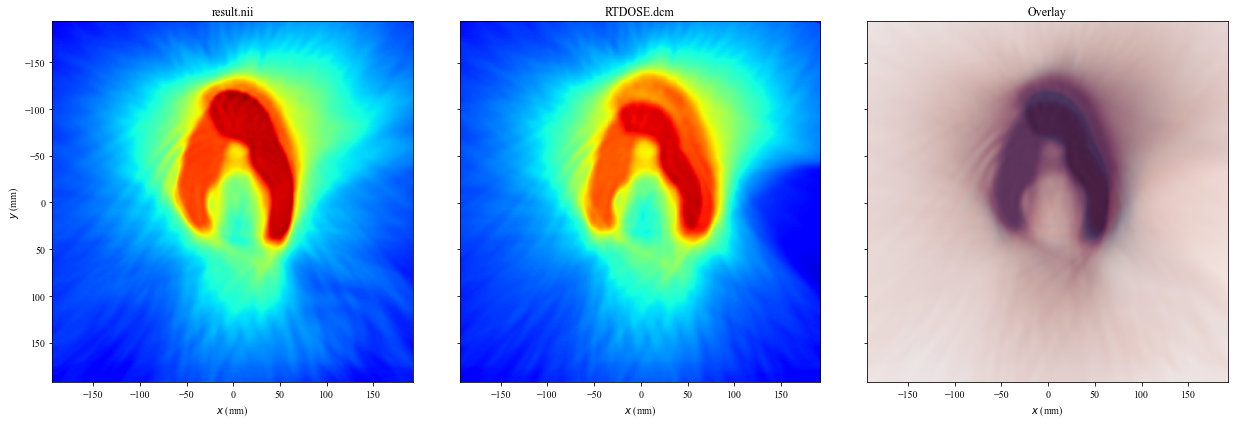

In [77]:
from skrt import Dose

dose_kv = Dose(f"{data_path}/head_and_neck/CT/RTDOSE.dcm")
reg.capture_output = True
dose_transformed = reg.transform(dose_kv)

dose_mv = Dose(f"{data_path}/head_and_neck/MVCT/1/RTDOSE.dcm")
dose_transformed.view(images=dose_mv, comparison=True);

### Transforming StructureSets
Image registration gives us a transform that maps each position in the **fixed image** to its corresponding location in the **moving image**. This gives us two ways to transform contours:

1. **Pull** contours from moving image to fixed image by resampling the contour binary mask into the fixed image's frame of reference.

2. **Push** contours from fixed image to moving image by applying the transform to the contour points.

In [78]:
# Resample the kVCT structures (as binary masks) into the MVCT domain
from skrt import StructureSet

names = {
    'MPC': 'mpc',
    'Oral cavity': 'oral*cavity',
    'SPC': 'spc',
    'SG larynx': 'sg*',
    'Left parotid': ['left*parotid', 'parotid*left'],
    'Right parotid': ['right*parotid', 'parotid*right']
}
structs_kv = StructureSet(f"{data_path}/head_and_neck/CT/RTSTRUCT.dcm", names=names, keep_renamed_only=True)
structs_kv_transformed = reg.transform(structs_kv)

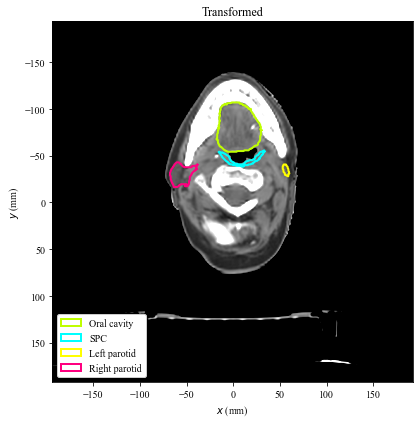

In [79]:
structs_kv_transformed.view(legend=True);

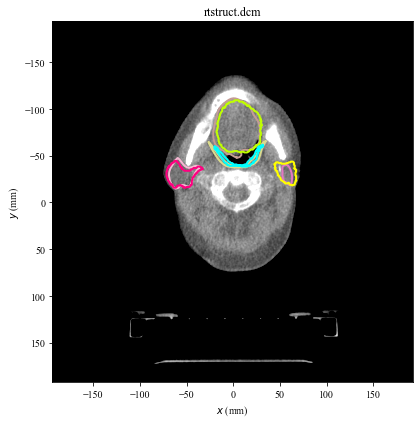

In [80]:
# Compare the propagated ROIs with the manually drawn ROIs
structs_mv = StructureSet(f"{data_path}/head_and_neck/MVCT/1/RTSTRUCT.dcm", names=names, image=reg.fixed_image,
                          ignore_dicom_colors=True)
structs_mv.view(rois=structs_kv_transformed, compare_rois=True);

### Transforming contour points

In [81]:
# Need to find a transform in the opposite direction (kVCT -> MVCT)
reg2 = Registration(
    'kvct_fixed',
    fixed=f'{data_path}/head_and_neck/CT/image/',
    moving=f'{data_path}/head_and_neck/MVCT/1/image/',
    capture_output=True,
    log_level="INFO",
    overwrite=True,
    pfiles=reg.pfiles  # Copy parameter files from first registration
)

In [82]:
reg2.register()

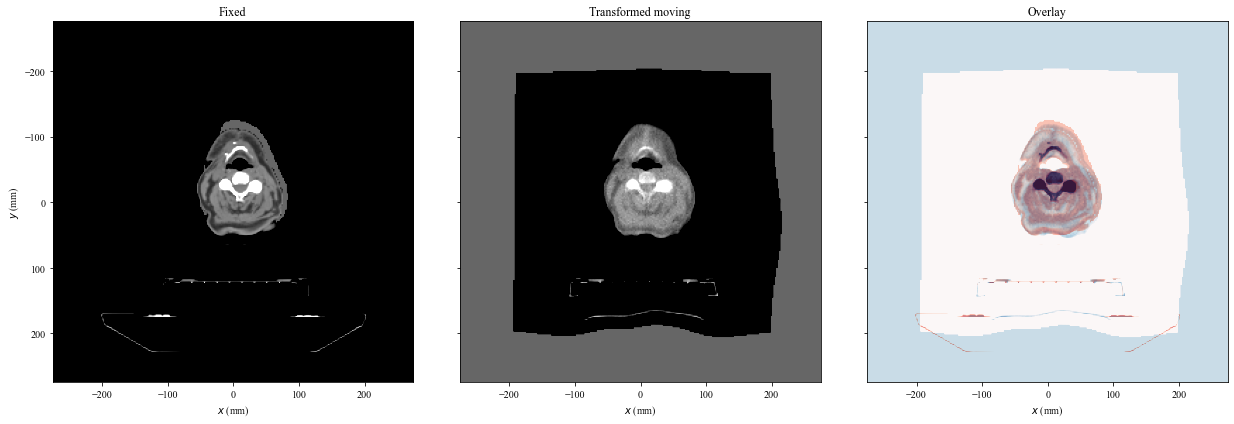

In [83]:
reg2.view_result()

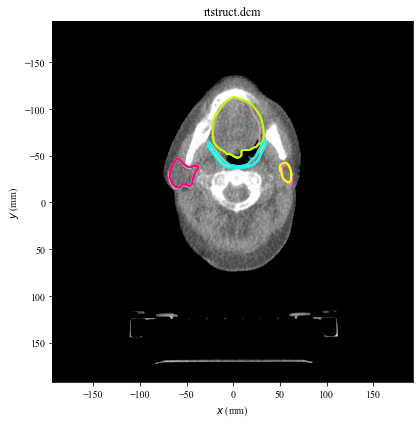

In [84]:
# Transform structure points
structs_kv2 = reg2.transform(structs_kv, transform_points=True)
structs_mv.view(rois=structs_kv2, compare_rois=True);

In [85]:
# Or get pandas DataFrame - more useful for non-interactive work
structs_mv.get_comparison(structs_kv2)

,dice,centroid_x,centroid_y,centroid_z
MPC,0.583041,-0.406901,0.572243,-0.200534
Oral cavity,0.660734,0.078472,-0.137244,-0.413407
Left parotid,0.527988,-0.832692,-0.950854,0.365143
Right parotid,0.660285,0.199697,-0.032434,0.438092
SG larynx,0.761371,0.689969,-0.092627,-0.011982
SPC,0.768145,-1.044123,0.171099,0.019664


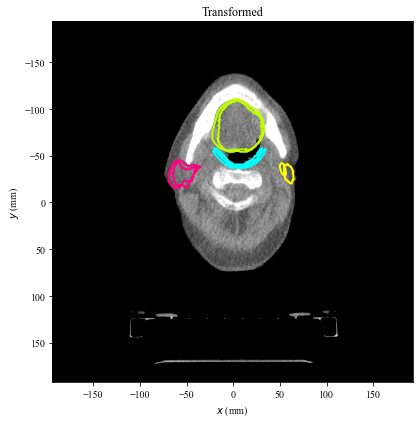

In [86]:
# Compare both sets of transformed ROIs
structs_kv2.view(rois=[structs_kv_transformed], compare_rois=['dice', 'dice_slice']);

In [87]:
# Make new StructureSet containing consensus of the two transforms
combined = StructureSet()
for name in structs_kv2.get_roi_names():
    pair = StructureSet([structs_kv2.get_roi(name), structs_kv_transformed.get_roi(name)])
    staple = pair.get_overlap()
    staple.name = name
    combined.add_roi(staple)

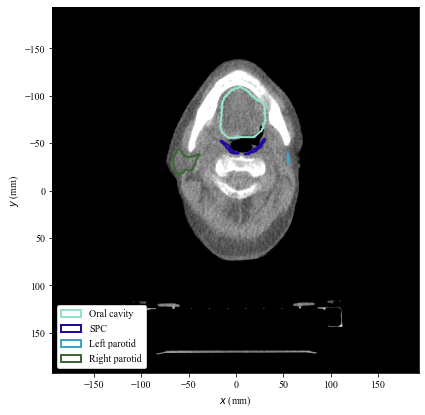

In [88]:
combined.set_image(structs_kv2.image)
combined.view(legend=True);